In [1]:
# SEE IF SUPERCLASS(CAR) classifier works. chose ResNet50 for speed/accuracy balance
# https://keras.io/api/applications/#usage-examples-for-image-classification-models

In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os,random
import re, shutil, tqdm
from os import listdir, mkdir
from os.path import isfile, join, isdir

sample_size = 5
working_dir = 'all_scraped_raw'
model = ResNet50(weights='imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


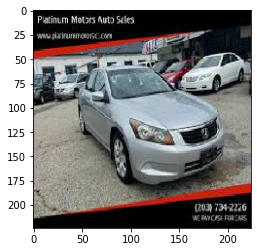

['limousine', 'pickup']


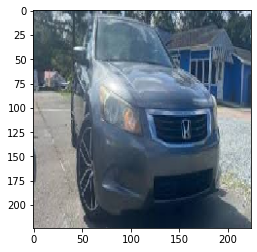

['minivan', 'minibus']


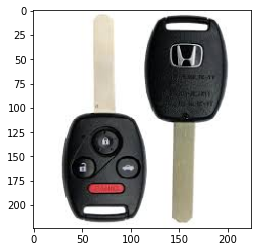

['remote_control', 'barbell']


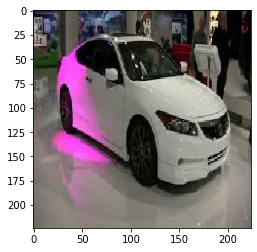

['limousine', 'minivan']


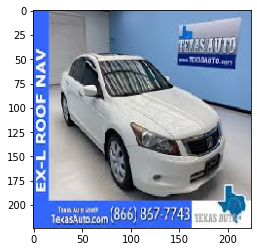

['limousine', 'beach_wagon']


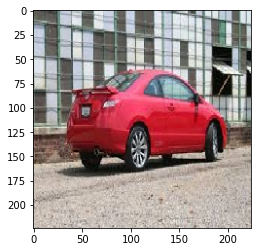

['pickup', 'minivan']


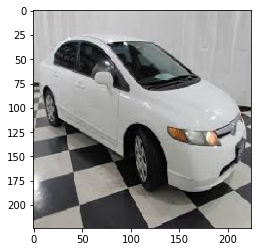

['minivan', 'moving_van']


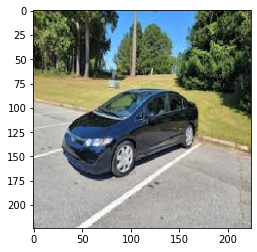

['minivan', 'sports_car']


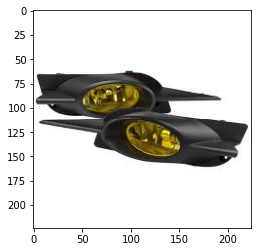

['hair_slide', 'mortarboard']


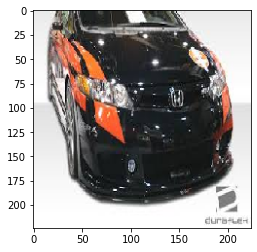

['crash_helmet', 'minivan']


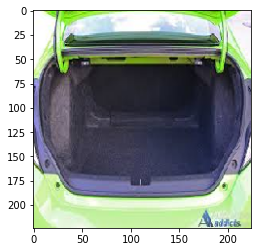

['minivan', 'garbage_truck']


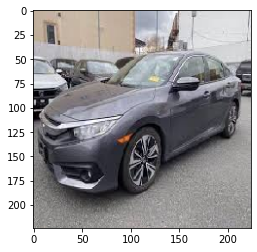

['beach_wagon', 'convertible']


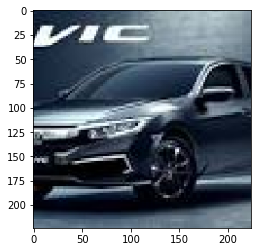

['beach_wagon', 'limousine']


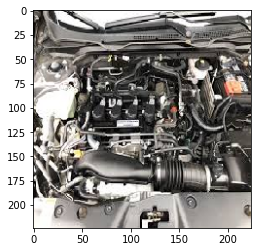

['space_bar', 'typewriter_keyboard']


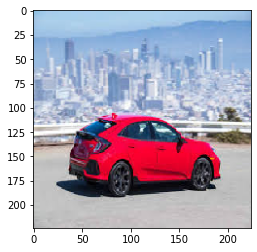

['sports_car', 'car_wheel']


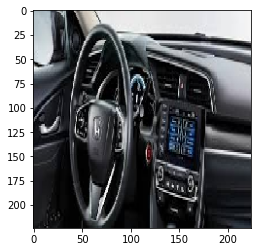

['grille', 'limousine']


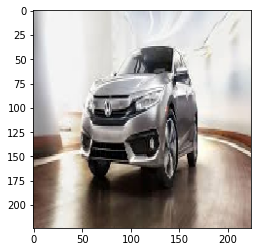

['minivan', 'sports_car']


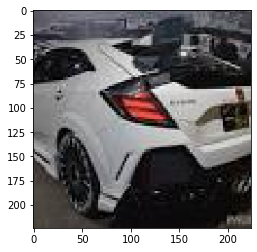

['racer', 'sports_car']


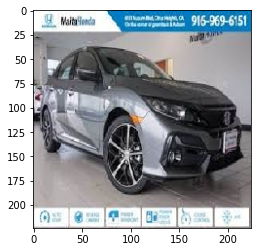

['convertible', 'pickup']


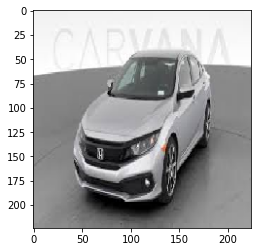

['minivan', 'minibus']


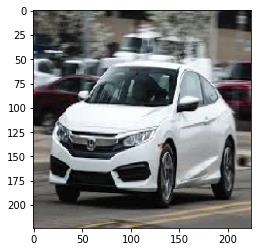

['minivan', 'minibus']


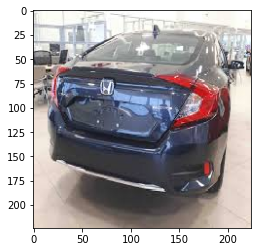

['convertible', 'sports_car']


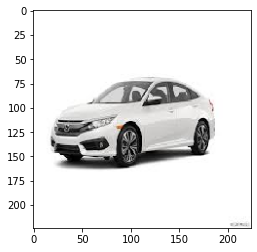

['minivan', 'beach_wagon']


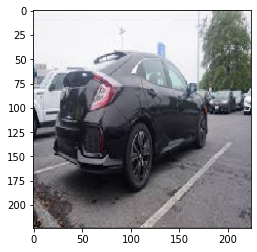

['car_wheel', 'tow_truck']


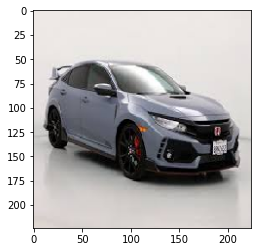

['sports_car', 'racer']


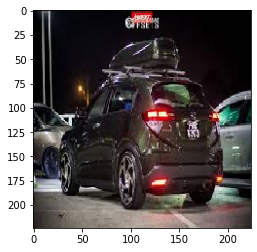

['racer', 'sports_car']


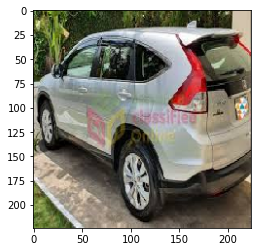

['beach_wagon', 'racer']


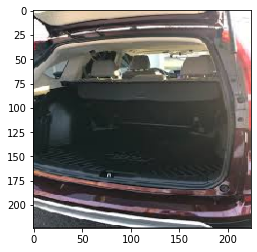

['beach_wagon', 'grille']


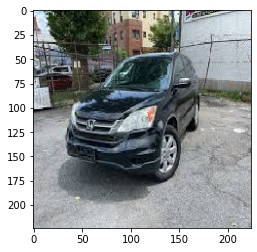

['minivan', 'moving_van']


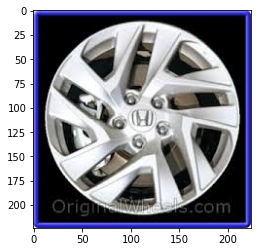

['car_wheel', 'disk_brake']


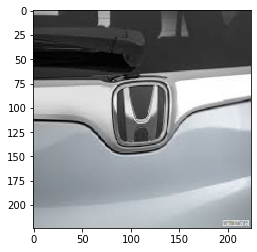

['limousine', 'grille']


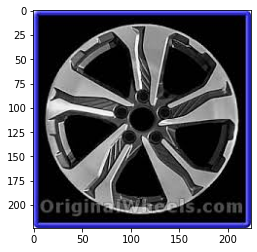

['car_wheel', 'electric_fan']


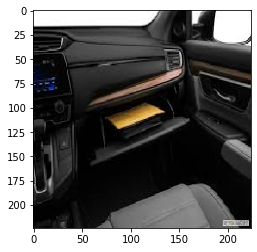

['limousine', 'printer']


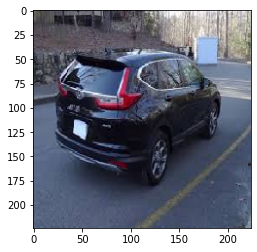

['sports_car', 'pickup']


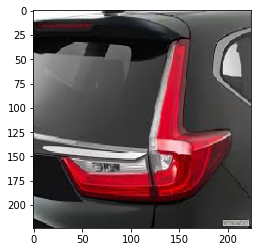

['sports_car', 'crash_helmet']


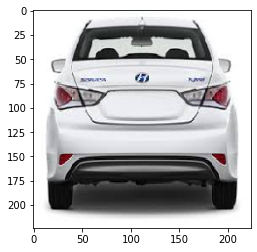

['racer', 'convertible']


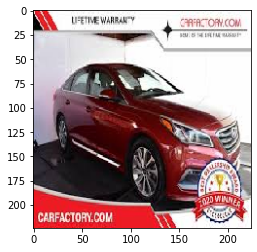

['convertible', 'sports_car']


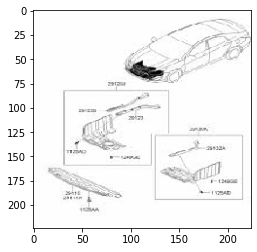

['dragonfly', 'rubber_eraser']


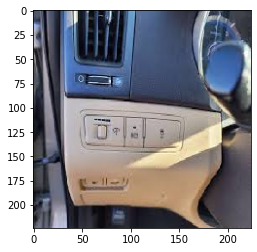

['desktop_computer', 'tape_player']


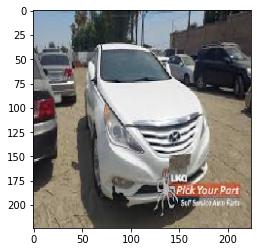

['minivan', 'beach_wagon']


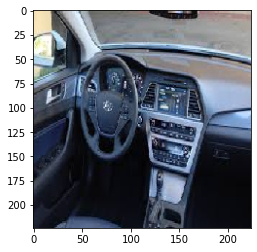

['cassette_player', 'tape_player']


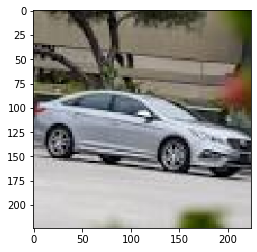

['limousine', 'minivan']


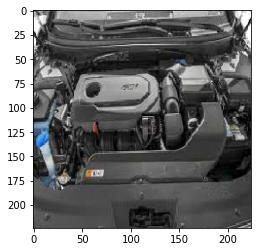

['minivan', 'pickup']


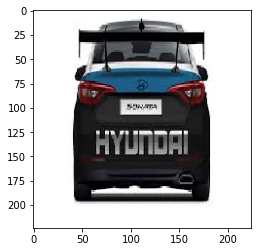

['racer', 'sports_car']


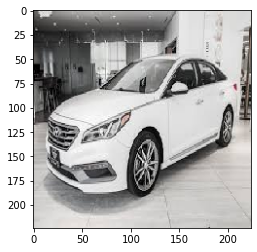

['minivan', 'beach_wagon']


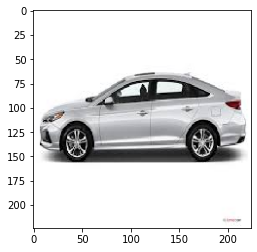

['beach_wagon', 'convertible']


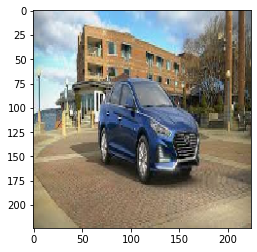

['pickup', 'minivan']


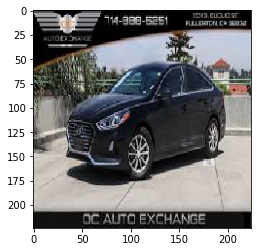

['minivan', 'beach_wagon']


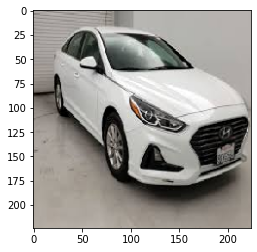

['limousine', 'beach_wagon']


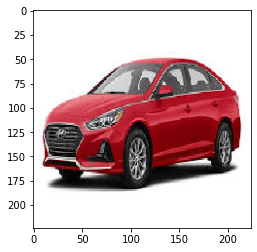

['beach_wagon', 'minivan']


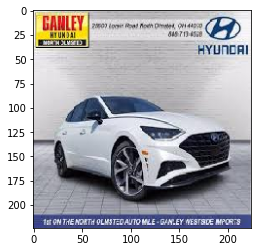

['sports_car', 'racer']


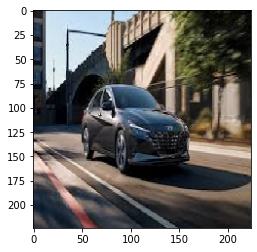

['minivan', 'moving_van']


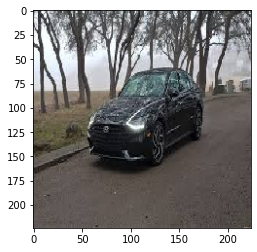

['beach_wagon', 'minivan']


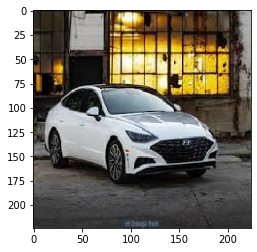

['limousine', 'cab']


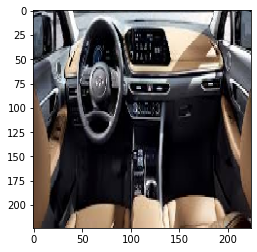

['limousine', 'racer']


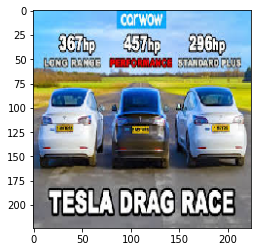

['minivan', 'moving_van']


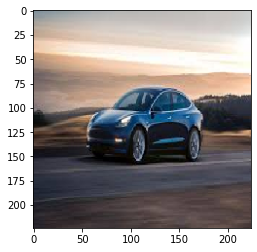

['racer', 'sports_car']


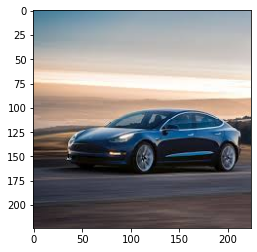

['minivan', 'car_wheel']


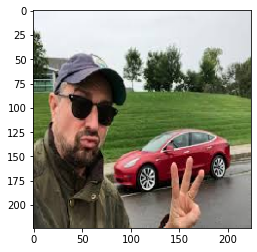

['coho', 'barracouta']


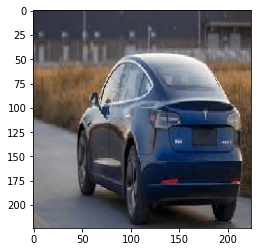

['mailbox', 'parking_meter']


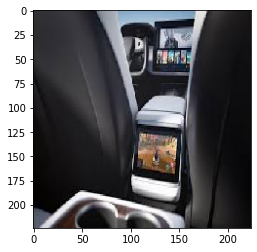

['seat_belt', 'limousine']


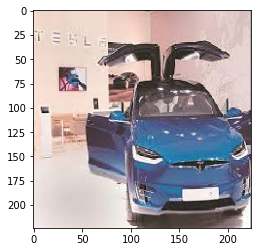

['beach_wagon', 'convertible']


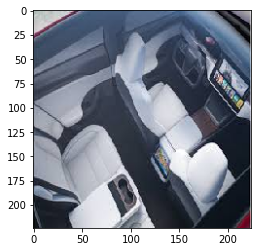

['television', 'seat_belt']


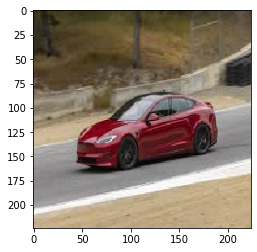

['racer', 'sports_car']


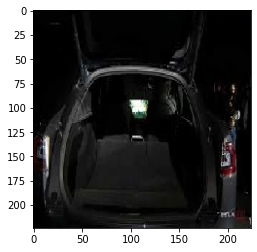

['grille', 'limousine']


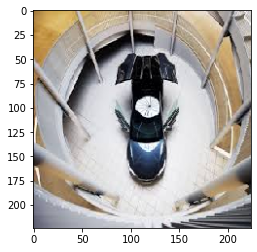

['warplane', 'coil']


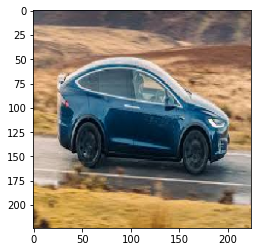

['racer', 'minivan']


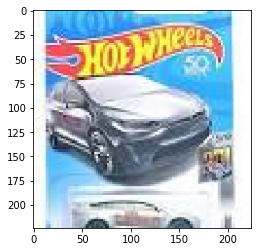

['waffle_iron', 'can_opener']


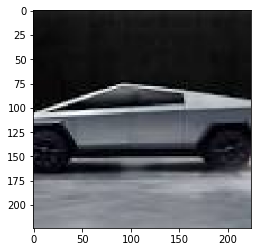

['convertible', 'limousine']


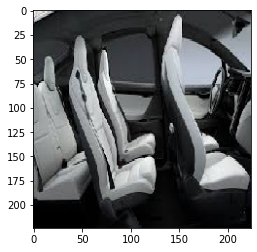

['minivan', 'coral_fungus']


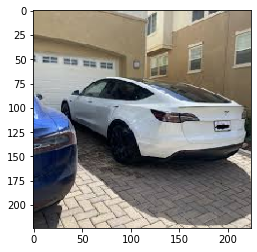

['limousine', 'convertible']


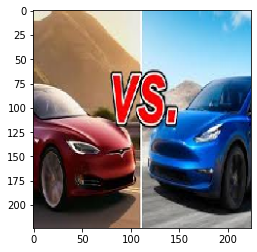

['sports_car', 'racer']


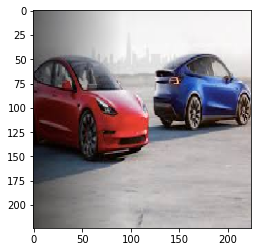

['sports_car', 'racer']


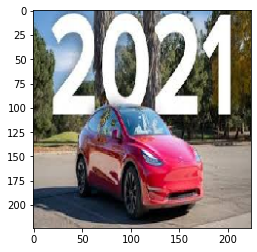

['sports_car', 'racer']


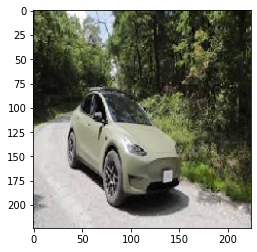

['pickup', 'minivan']


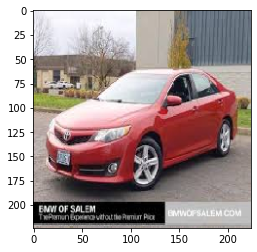

['pickup', 'sports_car']


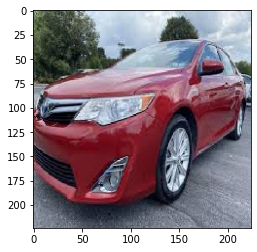

['sports_car', 'convertible']


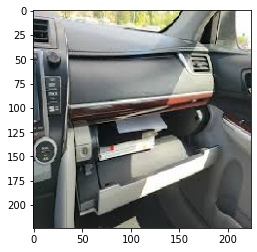

['motor_scooter', 'printer']


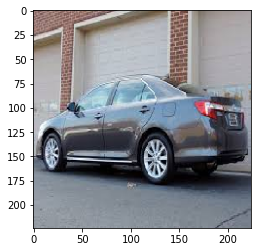

['convertible', 'sports_car']


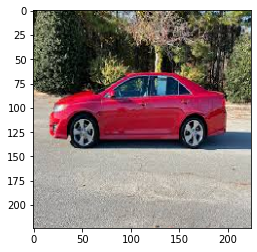

['convertible', 'sports_car']


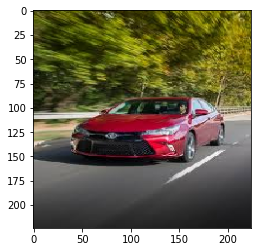

['convertible', 'racer']


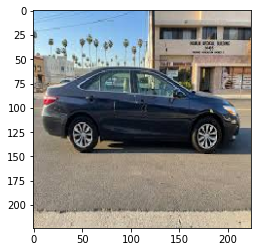

['minivan', 'beach_wagon']


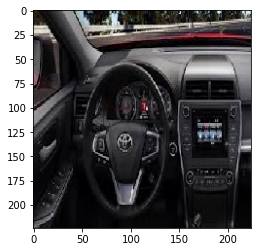

['parking_meter', 'grille']


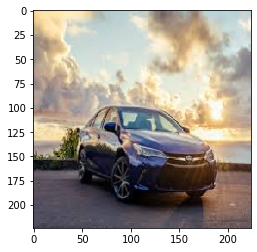

['racer', 'pickup']


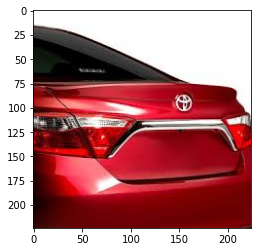

['sports_car', 'convertible']


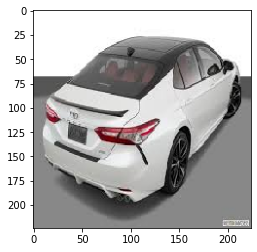

['limousine', 'racer']


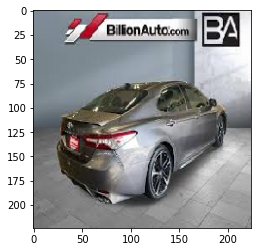

['sports_car', 'convertible']


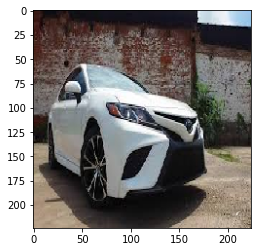

['racer', 'car_wheel']


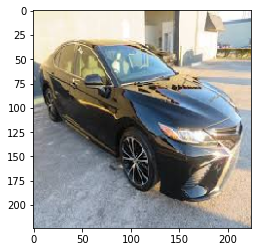

['sports_car', 'car_wheel']


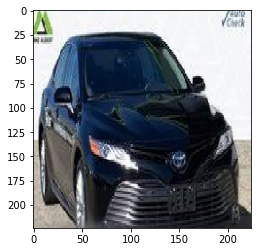

['minivan', 'pickup']


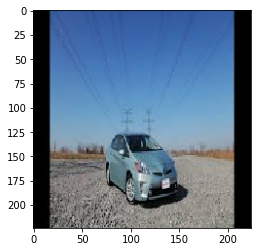

['minivan', 'television']


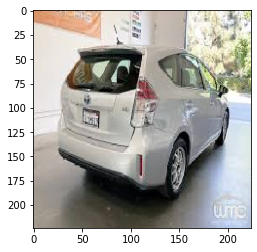

['limousine', 'moving_van']


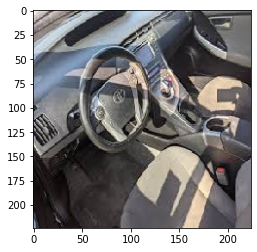

['warplane', 'motor_scooter']


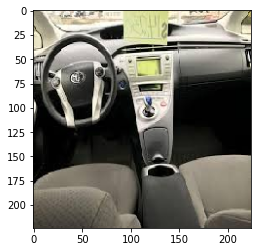

['convertible', 'limousine']


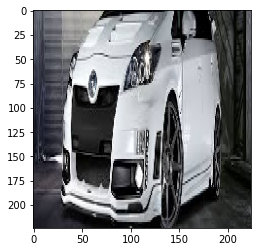

['trailer_truck', 'moving_van']


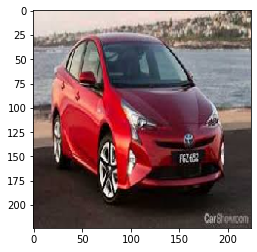

['minivan', 'sports_car']


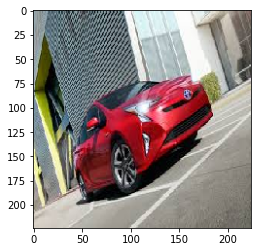

['sports_car', 'racer']


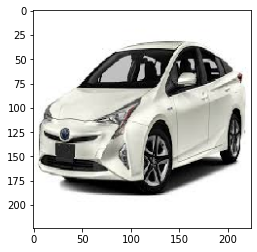

['car_wheel', 'minivan']


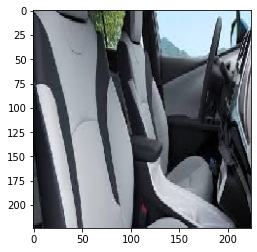

['seat_belt', 'gondola']


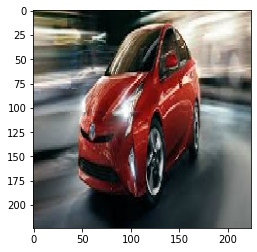

['sports_car', 'racer']


In [16]:
tag_set = set()
for folder in listdir(working_dir):
    for _ in range(sample_size):
        #print( join(working_dir, folder,random.choice(os.listdir(join(working_dir, folder)))))
        img_path = join(working_dir, folder,random.choice(os.listdir(join(working_dir, folder))))
        

        #img_path = 'elephant.jpg'
        img = image.load_img(img_path, target_size=(224, 224))
        plt.imshow(img)
        plt.show()
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        preds = model.predict(x)
        # decode the results into a list of tuples (class, description, probability)
        # (one such list for each sample in the batch)
        print([p[1] for p in decode_predictions(preds, top=2)[0]])
        for t in [p[1] for p in decode_predictions(preds, top=2)[0]]:
            tag_set.add(t)

In [15]:
tag_set

{'CD_player',
 'Model_T',
 'Polaroid_camera',
 'abaya',
 'airliner',
 'alp',
 'ambulance',
 'amphibian',
 'backpack',
 'barber_chair',
 'beach_wagon',
 'bell_cote',
 'binoculars',
 'brassiere',
 'bulletproof_vest',
 'cab',
 'cannon',
 'car_mirror',
 'car_wheel',
 "carpenter's_kit",
 'carton',
 'cash_machine',
 'cassette',
 'cassette_player',
 'cleaver',
 'cliff',
 'coil',
 'combination_lock',
 'convertible',
 'crash_helmet',
 'desk',
 'desktop_computer',
 'fire_engine',
 'football_helmet',
 'gas_pump',
 'geyser',
 'go-kart',
 'golfcart',
 'grille',
 'handkerchief',
 'hatchet',
 'jeep',
 'jinrikisha',
 'joystick',
 'laptop',
 'lighter',
 'limousine',
 'loudspeaker',
 'mailbag',
 'microphone',
 'minibus',
 'minivan',
 'missile',
 'mobile_home',
 'monitor',
 'motor_scooter',
 'mousetrap',
 'moving_van',
 'muzzle',
 'odometer',
 'parking_meter',
 'passenger_car',
 'pay-phone',
 'pickup',
 'police_van',
 'power_drill',
 'projectile',
 'racer',
 'radio',
 'recreational_vehicle',
 'reel',
 'r